In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### Load the datasets and render their basic informations

In [2]:
credits_df = pd.read_csv("tmdb_5000_credits.csv")
movies_df = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [5]:
# add a new row named "crew" that filled by the crew values in credits_df

movies_df["crew"] = credits_df.loc[credits_df["movie_id"] == movies_df["id"]]["crew"]

In [6]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
# the "crew" column values are dictionaries that saved as string data, so we can fix this problem using "eval" method to convert this string to dictionaries

movies_df["crew"] = movies_df["crew"].apply(lambda x: eval(x))

In [8]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [9]:
# extracing the directos from the "crew" column values and put them into a new column that named "directors"

directors = []

for row in movies_df["crew"]:
    each_row = []
    for element in row:
        if element["job"] == "Director":
            each_row.append(element["name"])

    directors.append(each_row)

In [10]:
movies_df["directors"] = directors

In [11]:
movies_df.head(20)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,crew,directors
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{'credit_id': '52fe48009251416c750aca23', 'de...",[James Cameron]
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{'credit_id': '52fe4232c3a36847f800b579', 'de...",[Gore Verbinski]
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{'credit_id': '54805967c3a36829b5002c41', 'de...",[Sam Mendes]
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",[Christopher Nolan]
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",[Andrew Stanton]
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,"[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",[Sam Raimi]
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,"[{'credit_id': '52fe46db9251416c91062101', 'de...","[Byron Howard, Nathan Greno]"
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movi

### Data cleaning and droping useless columns

In [12]:
# droping useless columns

movies_df.drop(columns=["homepage", "id", "overview", "runtime", "keywords", "tagline", "crew"], axis=1, inplace=True)

In [13]:
movies_df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,[James Cameron]
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski]
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,[Sam Mendes]
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,[Christopher Nolan]
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,[Andrew Stanton]


In [14]:
# we have some 0 in our dataset, they will make problem in our statistic analysis.
# so we can replace the median value of that column values into them.

def replace_median(data_frame, columns):
  for column in columns:
    median = data_frame[data_frame[column] > 0][column].median()
    data_frame[column] = data_frame[column].replace(0, median)

  return data_frame


movies_df = replace_median(movies_df, ['budget', 'revenue', 'vote_average', 'vote_count'])

In [15]:
movies_df

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,[James Cameron]
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski]
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,[Sam Mendes]
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,[Christopher Nolan]
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,[Andrew Stanton]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",es,El Mariachi,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,El Mariachi,6.6,238,[Robert Rodriguez]
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",en,Newlyweds,0.642552,[],[],2011-12-26,51751835,[],Released,Newlyweds,5.9,5,[Edward Burns]
4800,23000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"Signed, Sealed, Delivered",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,51751835,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Signed, Sealed, Delivered",7.0,6,[Scott Smith]
4801,23000000,[],en,Shanghai Calling,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,51751835,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Shanghai Calling,5.7,7,[Daniel Hsia]


In [16]:
# droping the null values

movies_df = movies_df.dropna(how="all", axis=1)

In [17]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   spoken_languages      4803 non-null   object 
 10  status                4803 non-null   object 
 11  title                 4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
 14  directors             4803 non-null   object 
dtypes: float64(2), int64(

In [18]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,3.401089e+07,3.820157e+07,1.0,1.200000e+07,2.300000e+07,4.000000e+07,3.800000e+08
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.668070e+00,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,9.763642e+07,1.566898e+08,5.0,2.760697e+07,5.175184e+07,9.291719e+07,2.787965e+09
vote_average,4803.0,6.173496e+00,9.662868e-01,0.5,5.600000e+00,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.933419e+02,1.233140e+03,1.0,5.900000e+01,2.420000e+02,7.370000e+02,1.375200e+04


In [19]:
# Budgets less than 1,000 and incomes less than 1,000 are unreasonable and may have been recorded incorrectly.
# We can consider a threshold to remove budgets and incomes less than that as outliers

print(f"variance of budget : {movies_df['budget'].var()}")
print(f"variance of revenue : {movies_df['revenue'].var()}")

movies_df.drop(index=movies_df.loc[movies_df["revenue"] < 500].index, inplace=True)
movies_df.drop(index=movies_df.loc[movies_df["budget"] < 1000].index, inplace=True)

variance of budget : 1459359777893515.5
variance of revenue : 2.4551692349827704e+16


In [20]:
print(f"variance of budget : {movies_df['budget'].var()}")
print(f"variance of revenue : {movies_df['revenue'].var()}")

variance of budget : 1464002414338172.8
variance of revenue : 2.471736839466447e+16


### doing some statistical operation on budget and revenue and build new columns

In [21]:
"""
To get the profit of a movie, we have to divide the revenue by the budget
If the result was more than one, it means that the movie was a good movie and otherwise it was not a good movie
Now, if we subtract this formula from one, we can compare the result with zero
"""

movies_df["B_C"] = (movies_df["revenue"] / movies_df["budget"]) - 1

In [22]:
movies_df.head(20)

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors,B_C
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,[James Cameron],10.763566
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski],2.203333
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,[Sam Mendes],2.594590
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,[Christopher Nolan],3.339756
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,[Andrew Stanton],0.092843
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",en,Spider-Man 3,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576,[Sam Raimi],2.452991
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",en,Tangled,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330,"[Byron Howard, Nathan Greno]",1.276134
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avengers: Age of Ultron,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767,[Joss Whedon],4.019299
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Harry Potter and the Half-Blood Prince,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Harry Potter and the Half-Blood Prince,7.4,5293,[David Yates],2.735837
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Batman v Superman: Dawn of Justice,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman v Superman: Dawn of Justice,5.7,7004,[Zack Snyder],2.493041


In [23]:
# if the value of the "status" column is 1 it's mean that movies is profitable othervise it's not

def determine_profitable_or_not(data):
    if data > 0:
        return 1

    elif data < 0:
        return 0

    else:
        return None

In [24]:
movies_df["status"] = movies_df["B_C"].apply(determine_profitable_or_not)

In [25]:
movies_df.head(20)

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors,B_C
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,Avatar,7.2,11800,[James Cameron],10.763566
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski],2.203333
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",1,Spectre,6.3,4466,[Sam Mendes],2.594590
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,The Dark Knight Rises,7.6,9106,[Christopher Nolan],3.339756
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,John Carter,6.1,2124,[Andrew Stanton],0.092843
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",en,Spider-Man 3,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,Spider-Man 3,5.9,3576,[Sam Raimi],2.452991
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",en,Tangled,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Tangled,7.4,3330,"[Byron Howard, Nathan Greno]",1.276134
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avengers: Age of Ultron,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Avengers: Age of Ultron,7.3,6767,[Joss Whedon],4.019299
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Harry Potter and the Half-Blood Prince,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Harry Potter and the Half-Blood Prince,7.4,5293,[David Yates],2.735837
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Batman v Superman: Dawn of Justice,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Batman v Superman: Dawn of Justice,5.7,7004,[Zack Snyder],2.493041


In [26]:
# convert the "genre" column datatype from str to dictionary

movies_df["genres"] = movies_df["genres"].apply(lambda x: eval(x))

In [27]:
# extract all the genres in the dataset

genres_list = []

for element in movies_df["genres"]:
    for genre in element:
        genres_list.append(genre["name"])

In [28]:
# drop the duplicated values in the genres_list

genres_list = list(set(genres_list))

In [29]:
genres_list

['Drama',
 'Animation',
 'Romance',
 'Adventure',
 'Mystery',
 'Thriller',
 'Action',
 'History',
 'Music',
 'Western',
 'Crime',
 'War',
 'Comedy',
 'Family',
 'Science Fiction',
 'TV Movie',
 'Fantasy',
 'Foreign',
 'Documentary',
 'Horror']

In [30]:
# calculate the budgeds that spend on the each movie's genre

budgets_per_genre = {}

for genre in genres_list:
    sum_of_budget = 0

    for row in movies_df.values:
        for element in row[1]:

            if element["name"] == genre:
                sum_of_budget += row[0]

    budgets_per_genre[genre] = sum_of_budget

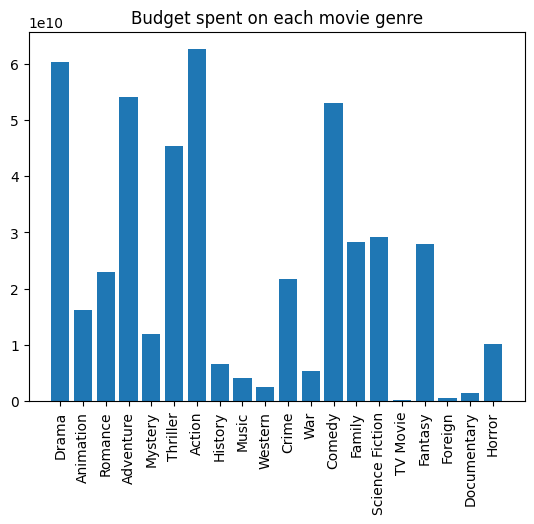

In [31]:
# now draw a bar plot to show a spent budget comparison for every movie's genre

plt.bar(budgets_per_genre.keys(), budgets_per_genre.values())
plt.title("Budget spent on each movie genre")
plt.xticks(rotation=90)
plt.show()

In [32]:
# Calculate the profit obtained from each movie genre.

B_C_per_genre = {}

for genre in list(set(genres_list)):
    sum_of_B_C = 0

    for row in movies_df.values:
        for element in row[1]:

            if element["name"] == genre:
                sum_of_B_C += row[15]

    B_C_per_genre[genre] = sum_of_B_C

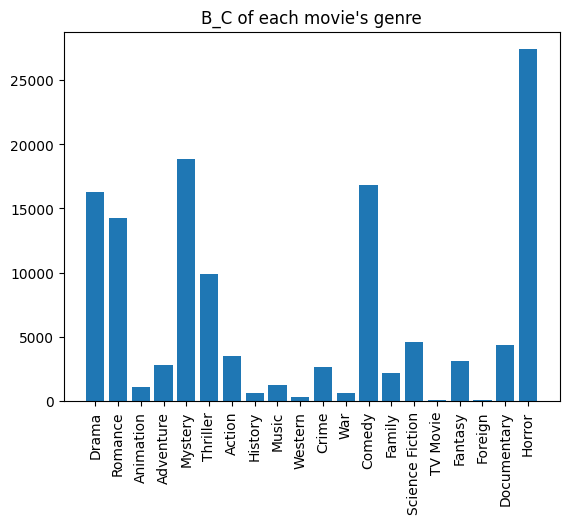

In [33]:
# draw a bar plot to show a comparison of earned benefit of each movie genre

plt.bar(B_C_per_genre.keys(), B_C_per_genre.values())
plt.title("B_C of each movie's genre")
plt.xticks(rotation=90)
plt.show()

### do som statistic operations on production_companies

In [34]:
# convert the datatype of "production_companies" from str to dictionary

movies_df["production_companies"] = movies_df["production_companies"].apply(lambda x: eval(x))

In [35]:
movies_df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors,B_C
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Avatar,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,Avatar,7.2,11800,[James Cameron],10.763566
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Pirates of the Caribbean: At World's End,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski],2.203333
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Spectre,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",1,Spectre,6.3,4466,[Sam Mendes],2.594590
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,The Dark Knight Rises,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,The Dark Knight Rises,7.6,9106,[Christopher Nolan],3.339756
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,John Carter,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,John Carter,6.1,2124,[Andrew Stanton],0.092843


In [36]:
# extract all of the production companies in dataset

companies = []

for row in movies_df.values:
    for element in row[5]:
        companies.append(element["name"])

companies = list(set(companies))

In [37]:
# the next step is to see the average of the budget that every company that spend

companies_average_budget = {}

for company in companies:
    sum_of_budget = 0
    counter = 0

    for row in movies_df.values:
        for element in row[5]:

            if element["name"] == company:
                sum_of_budget += row[0]
                counter += 1

    companies_average_budget[company] = sum_of_budget / counter # calculating the average by dividing the sum by counts

In [38]:
companies_average_budget

{'Vengeance Productions Pty. Ltd.': 110000000.0,
 'Parallel Zide': 43500000.0,
 'Institut Català de les Empreses Culturals (ICEC)': 40000000.0,
 'Rising Star': 34857142.85714286,
 '3L Filmproduktion GmbH': 10000000.0,
 'De Fina-Cappa': 42000000.0,
 'Twentieth Century Fox Television': 9000000.0,
 'Good Story Productions': 23000000.0,
 'Culmination Productions': 35000000.0,
 'Hemisphere Media Capital': 165000000.0,
 'Swanford Films': 68000000.0,
 'Insurge Pictures': 10500000.0,
 'Criminal Productions': 31500000.0,
 'Studio 4°C': 20000000.0,
 'Ovation Entertainment': 23000000.0,
 'Outlaw Productions (I)': 36000000.0,
 'Studio Ghibli': 26794424.75,
 'Icon Entertainment International': 39391666.666666664,
 'Madman Entertainment': 23000000.0,
 'Impact Pictures': 57666666.666666664,
 'Walt Disney': 100714285.71428572,
 'Three Good Men': 7000000.0,
 'Nickelodeon Movies': 57047619.047619045,
 'Darryl F. Zanuck Productions': 10000000.0,
 'OC Film': 6500000.0,
 'BorderLine Films': 23000000.0,
 'O

In [39]:
# select the top twenty companies with highest spended budget

top_twenty_companies_average_budget = {}

counter = 1
for k in sorted(companies_average_budget, key=companies_average_budget.get, reverse=True):
    top_twenty_companies_average_budget[k] = companies_average_budget[k]

    if counter == 20:
        break

    counter += 1

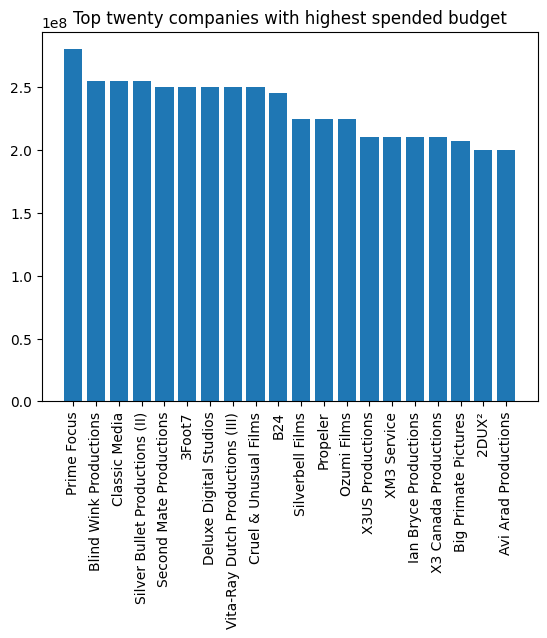

In [40]:
plt.bar(top_twenty_companies_average_budget.keys(), top_twenty_companies_average_budget.values())
plt.title("Top twenty companies with highest spended budget")
plt.xticks(rotation=90)
plt.show()

In [41]:
# now let's see the average benefit of each companies

companies_average_revenue = {}

for company in companies:
    sum_of_revenue = 0
    counter = 0

    for row in movies_df.values:
        for element in row[5]:

            if element["name"] == company:
                sum_of_revenue += row[8]
                counter += 1

    companies_average_revenue[company] = sum_of_revenue / counter

In [42]:
companies_average_revenue

{'Vengeance Productions Pty. Ltd.': 228738393.0,
 'Parallel Zide': 172027391.0,
 'Institut Català de les Empreses Culturals (ICEC)': 13644292.0,
 'Rising Star': 42055733.0,
 '3L Filmproduktion GmbH': 51751835.0,
 'De Fina-Cappa': 83932105.0,
 'Twentieth Century Fox Television': 18663238.0,
 'Good Story Productions': 51751835.0,
 'Culmination Productions': 51751835.0,
 'Hemisphere Media Capital': 468816506.25,
 'Swanford Films': 96976270.0,
 'Insurge Pictures': 53792246.5,
 'Criminal Productions': 14708696.0,
 'Studio 4°C': 51751835.0,
 'Ovation Entertainment': 51751835.0,
 'Outlaw Productions (I)': 43108343.5,
 'Studio Ghibli': 214122594.0,
 'Icon Entertainment International': 100720550.58333333,
 'Madman Entertainment': 51751835.0,
 'Impact Pictures': 103203258.83333333,
 'Walt Disney': 254952877.7142857,
 'Three Good Men': 46488.0,
 'Nickelodeon Movies': 143342440.04761904,
 'Darryl F. Zanuck Productions': 50100000.0,
 'OC Film': 51751835.0,
 'BorderLine Films': 3538446.0,
 'Ozla Pic

In [43]:
# select the top twenty companies with highest average benefit

top_twenty_companies_average_benefit = {}

counter = 1
for k in sorted(companies_average_revenue, key=companies_average_revenue.get, reverse=True):
    top_twenty_companies_average_benefit[k] = companies_average_revenue[k]

    if counter == 20:
        break

    counter += 1

In [44]:
top_twenty_companies_average_benefit

{'Québec Production Services Tax Credit': 1506249360.0,
 'Colorado Office of Film, Television & Media': 1506249360.0,
 'Abu Dhabi Film Commission': 1506249360.0,
 'Prime Focus': 1405403694.0,
 'Deluxe Digital Studios': 1153304495.0,
 'Vita-Ray Dutch Productions (III)': 1153304495.0,
 'Lightstorm Entertainment': 1124376356.8,
 'Ian Bryce Productions': 1091405097.0,
 'Second Mate Productions': 1013329906.0,
 'Fairview Entertainment': 966550600.0,
 '3Foot7': 956019788.0,
 'The Saul Zaentz Company': 898827882.0,
 'Patalex IV Productions Limited': 895921036.0,
 'China Movie Channel': 886867618.0,
 'B24': 880674609.0,
 'Cruel & Unusual Films': 873260194.0,
 'Media Rights Capital (MRC)': 861635974.0,
 "The Donners' Company": 783112979.0,
 'Marvel Studios': 779876975.3846154,
 'Bulletproof Cupid': 773328629.0}

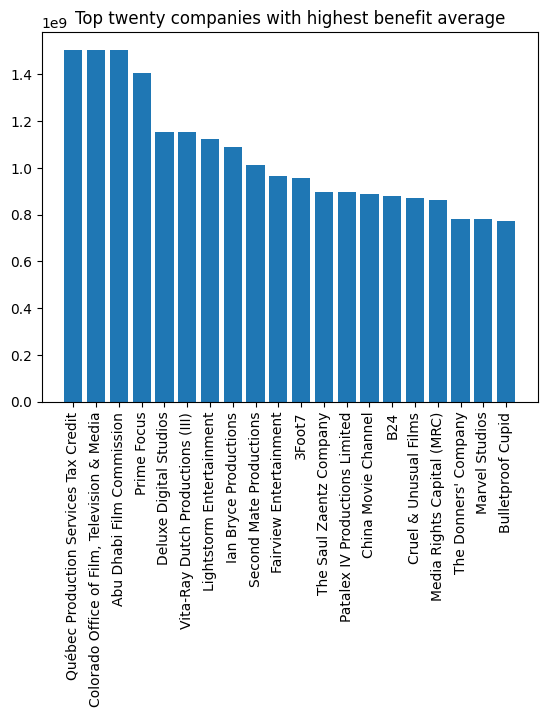

In [45]:
plt.bar(top_twenty_companies_average_benefit.keys(), top_twenty_companies_average_benefit.values())
plt.title("Top twenty companies with highest benefit average")
plt.xticks(rotation=90)
plt.show()

In [46]:
# now let's see the B_C of each companies

companies_B_C = {}

for company in companies:
    sum_of_B_C = 0

    for row in movies_df.values:
        for element in row[5]:

            if element["name"] == company:
                sum_of_B_C += row[15]

    companies_B_C[company] = sum_of_B_C

In [47]:
# select the top twenty companies with highest B_C

top_twenty_companies_B_C= {}

counter = 1
for k in sorted(companies_B_C, key=companies_B_C.get, reverse=True):
    top_twenty_companies_B_C[k] = companies_B_C[k]

    if counter == 20:
        break

    counter += 1

In [48]:
top_twenty_companies_B_C

{'Blumhouse Productions': 13702.451067943215,
 'Solana Films': 13031.5341804,
 'Artisan Entertainment': 4142.272659356738,
 'Haxan Films': 4133.583413115942,
 'Strand Releasing': 1916.9847094122383,
 'Universal Pictures': 1301.962925299611,
 'Paramount Pictures': 1232.1330579869423,
 'New Line Cinema': 1218.2562252648781,
 'LeBrocquy Fraser Productions': 1125.9149932487921,
 'NHK': 1124.0398913043477,
 'Hubert Bals Fund': 1124.0398913043477,
 'Barmak Film': 1124.0398913043477,
 'HPLHS': 1034.0367,
 'Abundant Productions': 1034.0367,
 'Sequart': 1034.0367,
 'Faith vs. Fate Productions': 1034.0367,
 'Little Big Film Company': 1034.0367,
 'Respect Films': 1034.0367,
 'Twentieth Century Fox Film Corporation': 965.6130755281122,
 'Warner Bros.': 892.6451796981746}

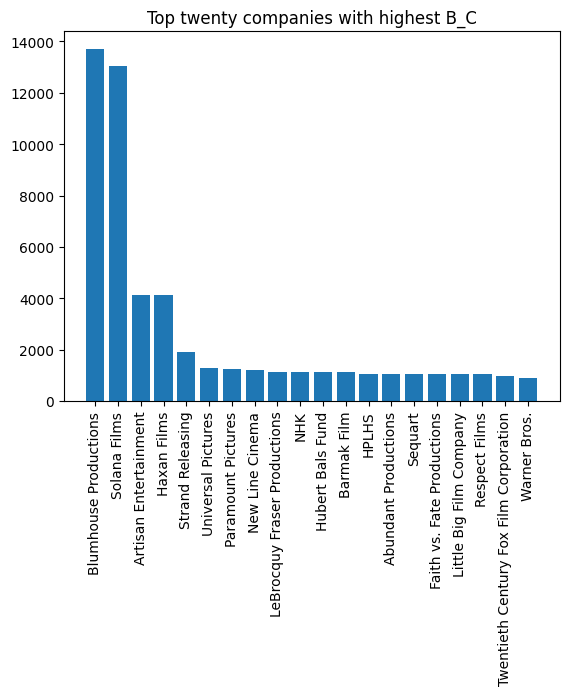

In [49]:
plt.bar(top_twenty_companies_B_C.keys(), top_twenty_companies_B_C.values())
plt.title("Top twenty companies with highest B_C")
plt.xticks(rotation=90)
plt.show()

### do some statistical operations based on directors

In [50]:
movies_df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors,B_C
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Avatar,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,Avatar,7.2,11800,[James Cameron],10.763566
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Pirates of the Caribbean: At World's End,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski],2.203333
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Spectre,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",1,Spectre,6.3,4466,[Sam Mendes],2.594590
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,The Dark Knight Rises,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,The Dark Knight Rises,7.6,9106,[Christopher Nolan],3.339756
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,John Carter,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,John Carter,6.1,2124,[Andrew Stanton],0.092843


In [ ]:
# build a dictionary that shows how much profit each director had, how much he/she earned and how much he/she spent.

directors_statistics = {}

for row in movies_df["directors"]:
    for director in row:
        directors_statistics[director] = {
            "revenue": 0,
            "budget": 0,
            "B_C": 0
        }

directors_statistics

In [58]:
for director in directors_statistics.keys():
    for row in movies_df.iterrows():
        if director in row[1]["directors"]:
            directors_statistics[director]["revenue"] += row[1]["revenue"]
            directors_statistics[director]["budget"] += row[1]["budget"]
            directors_statistics[director]["B_C"] += row[1]["B_C"]

In [59]:
directors_statistics

{'James Cameron': {'revenue': 5883569439,
  'budget': 746900000,
  'B_C': 45.923579622083906},
 'Gore Verbinski': {'revenue': 3177013357,
  'budget': 1107000000,
  'B_C': 11.598534006353631},
 'Sam Mendes': {'revenue': 2713548809,
  'budget': 664000000,
  'B_C': 32.52445673921969},
 'Christopher Nolan': {'revenue': 4227483234,
  'budget': 1005000000,
  'B_C': 23.14345606431571},
 'Andrew Stanton': {'revenue': 2109045355,
  'budget': 654000000,
  'B_C': 13.019746382555919},
 'Sam Raimi': {'revenue': 3288156967,
  'budget': 946950000,
  'B_C': 101.98465041647142},
 'Byron Howard': {'revenue': 901774930,
  'budget': 410000000,
  'B_C': 2.3426676625641027},
 'Nathan Greno': {'revenue': 591794936,
  'budget': 260000000,
  'B_C': 1.2761343692307694},
 'Joss Whedon': {'revenue': 2963831068,
  'budget': 539000000,
  'B_C': 9.923033239310689},
 'David Yates': {'revenue': 2228914996,
  'budget': 580000000,
  'B_C': 8.972494269111111},
 'Zack Snyder': {'revenue': 2476197387,
  'budget': 860000000

In [ ]:
# save the extracted data into a csv file

directors_df = pd.DataFrame(index=directors_statistics.keys(), columns=["revenue", "budget", "B_C"], data=directors_statistics.values())

In [63]:
directors_df.head()

,revenue,budget,B_C
James Cameron,5883569439,746900000,45.923580
Gore Verbinski,3177013357,1107000000,11.598534
Sam Mendes,2713548809,664000000,32.524457
Christopher Nolan,4227483234,1005000000,23.143456
Andrew Stanton,2109045355,654000000,13.019746


In [55]:
directors_df.to_csv("directors_df.csv", index=False)

In [51]:
directors_df = pd.read_csv("directors_df.csv")

In [52]:
# check out top twenty directors who had the most earned revenue.

directors_revenue = directors_df[["director", "revenue"]]

In [53]:
directors_revenue

,director,revenue
0,James Cameron,5883569439
1,Gore Verbinski,3177013357
2,Sam Mendes,2713548809
3,Christopher Nolan,4227483234
4,Andrew Stanton,2109045355
...,...,...
2540,Ian Gamazon,51751835
2541,Scott Smith,51751835
2542,Daniel Hsia,51751835
2543,Brian Herzlinger,51751835


In [54]:
directors_revenue.sort_values(ascending=False, by="revenue")[:20]

,director,revenue
40,Steven Spielberg,9147393164
16,Peter Jackson,6498642820
0,James Cameron,5883569439
28,Michael Bay,5832524638
3,Christopher Nolan,4227483234
140,Chris Columbus,3829135173
47,Robert Zemeckis,3590622002
156,George Lucas,3339113893
25,Tim Burton,3337418241
5,Sam Raimi,3288156967


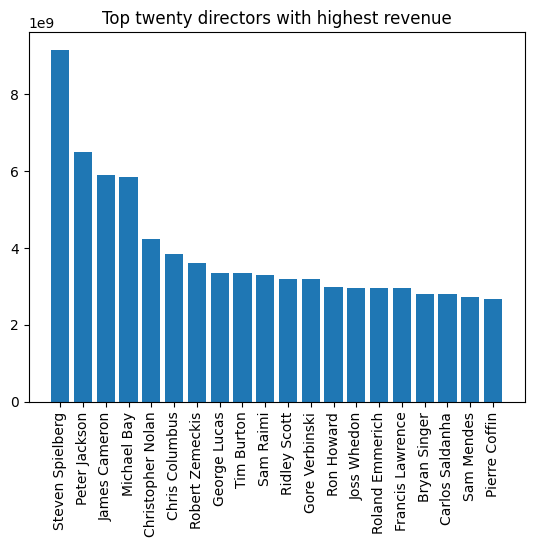

In [55]:
plt.bar(directors_revenue.sort_values(ascending=False, by="revenue")[:20]["director"], directors_revenue.sort_values(ascending=False, by="revenue")[:20]["revenue"])
plt.title("Top twenty directors with highest revenue")
plt.xticks(rotation=90)
plt.show()

In [56]:
# new let's check which directors spent the most budget.

directors_budget = directors_df[["director", "budget"]]

In [57]:
directors_budget.sort_values(ascending=False, by="budget")[:20]

,director,budget
40,Steven Spielberg,1667500000
28,Michael Bay,1410000000
16,Peter Jackson,1293000000
18,Ridley Scott,1290000000
11,Bryan Singer,1159000000
1,Gore Verbinski,1107000000
3,Christopher Nolan,1005000000
25,Tim Burton,997000000
97,Ron Howard,997000000
47,Robert Zemeckis,990000000


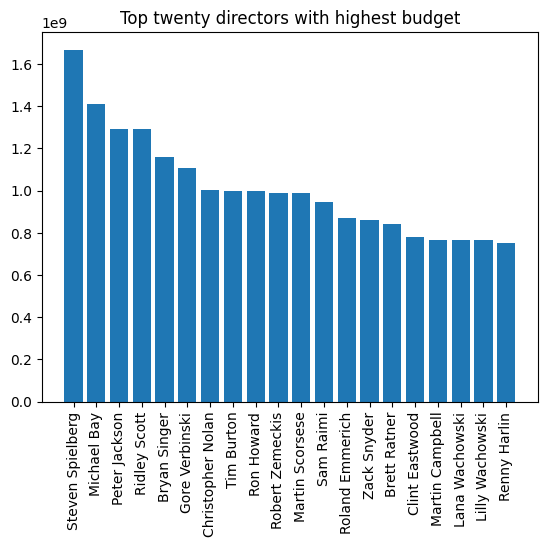

In [58]:
plt.bar(directors_budget.sort_values(ascending=False, by="budget")[:20]["director"], directors_budget.sort_values(ascending=False, by="budget")[:20]["budget"])
plt.title("Top twenty directors with highest budget")
plt.xticks(rotation=90)
plt.show()

In [59]:
# now, it's time to check thw directors who had the most profit earned.

directors_B_C = directors_df[["director", "B_C"]]

In [60]:
directors_B_C.sort_values(ascending=False, by="B_C")[:20]

,director,B_C
1784,Oren Peli,12898.737034
1867,Edward Burns,5764.101236
2333,Eduardo Sánchez,4132.333333
2332,Daniel Myrick,4132.333333
2521,Travis Legge,2352.606216
2527,James Bidgood,1915.734630
2353,Siddiq Barmak,1124.039891
2516,Patrick Meaney,1034.036700
2513,Andrew Leman,1034.036700
2512,Jem Cohen,1034.036700


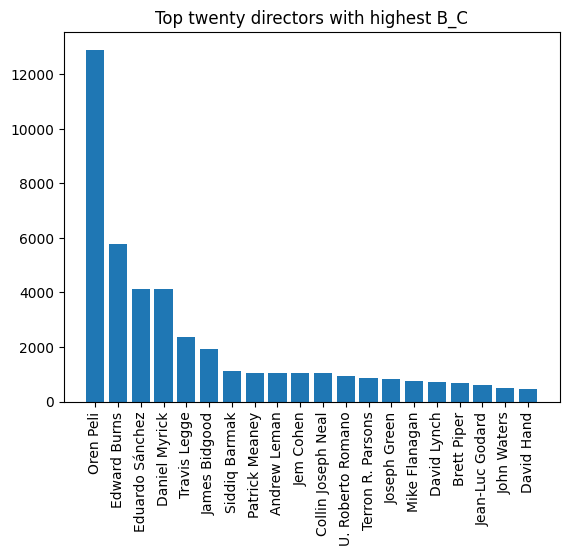

In [61]:
plt.bar(directors_B_C.sort_values(ascending=False, by="B_C")[:20]["director"], directors_B_C.sort_values(ascending=False, by="B_C")[:20]["B_C"])
plt.title("Top twenty directors with highest B_C")
plt.xticks(rotation=90)
plt.show()

### Performing statistical operations based on the release date of the film

In [62]:
# extract the year from release data

def year_extract(data):
    try:
        return int(data.split("-")[0])

    except:
        return None

In [63]:
movies_df["release_year"] = movies_df["release_date"].apply(year_extract)

In [64]:
print(f"minimum release year is: {int(min(movies_df['release_year']))}")
print(f"maximum release year is: {int(min(movies_df['release_year']))}")
print(f"variance release year is: {np.var(movies_df['release_year'])}")

minimum release year is: 1916
maximum release year is: 1916
variance release year is: 152.89646341339034


In [65]:
# build a dictionary that include the number of frequency of each release year in the dataset
# we can just keep the years that released movies more than 50 movies

years_frequency = {}

for (frequency, year) in zip(movies_df["release_year"].value_counts().values, movies_df["release_year"].value_counts().index):
    if frequency >= 50:
        years_frequency[frequency] = year

In [66]:
years_frequency

{244: 2009.0,
 235: 2006.0,
 234: 2014.0,
 227: 2008.0,
 226: 2013.0,
 225: 2010.0,
 222: 2011.0,
 216: 2005.0,
 213: 2015.0,
 206: 2012.0,
 203: 2002.0,
 199: 2004.0,
 192: 2007.0,
 182: 2001.0,
 168: 1999.0,
 167: 2003.0,
 165: 2000.0,
 131: 1998.0,
 112: 1997.0,
 104: 2016.0,
 97: 1996.0,
 69: 1995.0,
 55: 1994.0}

In [67]:
# build a new dataframe with the years that have frequency more than 50 times

df = movies_df[movies_df["release_year"].isin(years_frequency.values())]

In [68]:
df.head(20)

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors,B_C,release_year
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Avatar,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,Avatar,7.2,11800,[James Cameron],10.763566,2009.0
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Pirates of the Caribbean: At World's End,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski],2.203333,2007.0
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Spectre,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",1,Spectre,6.3,4466,[Sam Mendes],2.594590,2015.0
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,The Dark Knight Rises,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,The Dark Knight Rises,7.6,9106,[Christopher Nolan],3.339756,2012.0
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,John Carter,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,John Carter,6.1,2124,[Andrew Stanton],0.092843,2012.0
5,258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",en,Spider-Man 3,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,Spider-Man 3,5.9,3576,[Sam Raimi],2.452991,2007.0
6,260000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,Tangled,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Tangled,7.4,3330,"[Byron Howard, Nathan Greno]",1.276134,2010.0
7,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Avengers: Age of Ultron,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Avengers: Age of Ultron,7.3,6767,[Joss Whedon],4.019299,2015.0
8,250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Harry Potter and the Half-Blood Prince,98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Harry Potter and the Half-Blood Prince,7.4,5293,[David Yates],2.735837,2009.0
9,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Batman v Superman: Dawn of Justice,155.790452,"[{'name': 'DC Comics', 'id': 429}, {'name': 'A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Batman v Superman: Dawn of Justice,5.7,7004,[Zack Snyder],2.493041,2016.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4092 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4092 non-null   int64  
 1   genres                4092 non-null   object 
 2   original_language     4092 non-null   object 
 3   original_title        4092 non-null   object 
 4   popularity            4092 non-null   float64
 5   production_companies  4092 non-null   object 
 6   production_countries  4092 non-null   object 
 7   release_date          4092 non-null   object 
 8   revenue               4092 non-null   int64  
 9   spoken_languages      4092 non-null   object 
 10  status                4092 non-null   int64  
 11  title                 4092 non-null   object 
 12  vote_average          4092 non-null   float64
 13  vote_count            4092 non-null   int64  
 14  directors             4092 non-null   object 
 15  B_C                   4092

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4092.0,3.731031e+07,4.002515e+07,7000.000000,1.500000e+07,2.300000e+07,4.500000e+07,3.800000e+08
popularity,4092.0,2.210519e+01,3.338757e+01,0.001186,4.794770e+00,1.347448e+01,2.901335e+01,8.755813e+02
revenue,4092.0,1.023615e+08,1.636747e+08,792.000000,3.165219e+07,5.175184e+07,9.816637e+07,2.787965e+09
status,4092.0,7.971652e-01,4.021596e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
vote_average,4092.0,6.107283e+00,9.495902e-01,0.500000,5.600000e+00,6.200000e+00,6.700000e+00,1.000000e+01
vote_count,4092.0,7.266153e+02,1.281951e+03,1.000000,6.075000e+01,2.480000e+02,7.930000e+02,1.375200e+04
B_C,4092.0,1.255862e+01,2.375967e+02,-0.999966,2.609200e-01,1.250080e+00,2.680499e+00,1.288939e+04
release_year,4092.0,2.006388e+03,5.867841e+00,1994.000000,2.002000e+03,2.007000e+03,2.011000e+03,2.016000e+03


In [71]:
# build a function to take release years and return a range of starting and ending year

def determine_range_of_years(data):
    range_encoder = {
            2011: "2010-2015",
            2006: "2005-2010",
            2010: "2010-2015",
            2009: "2005-2010",
            2013: "2010-2015",
            2008: "2005-2010",
            2005: "2005-2010",
            2004: "2000-2005",
            2014: "2010-2015",
            2002: "2000-2005",
            2007: "2005-2010",
            2012: "2010-2015",
            2001: "2000-2005",
            2015: "2015-2020",
            2003: "2000-2005",
            2000: "2000-2005",
            1999: "1995-2000",
            1998: "1995-2000",
            1997: "1995-2000",
            2016: "2015-2020",
            1996: "1995-2000",
            1995: "1995-2000",
            1994: "1990-1995"
    }

    return range_encoder[data]

In [72]:
df["year_range"] = df["release_year"].apply(determine_range_of_years)

/tmp/ipykernel_5772/3571726484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_range"] = df["release_year"].apply(determine_range_of_years)


In [73]:
df.head(20)

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors,B_C,release_year,year_range
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Avatar,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,Avatar,7.2,11800,[James Cameron],10.763566,2009.0,2005-2010
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Pirates of the Caribbean: At World's End,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski],2.203333,2007.0,2005-2010
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Spectre,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",1,Spectre,6.3,4466,[Sam Mendes],2.594590,2015.0,2015-2020
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,The Dark Knight Rises,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,The Dark Knight Rises,7.6,9106,[Christopher Nolan],3.339756,2012.0,2010-2015
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,John Carter,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,John Carter,6.1,2124,[Andrew Stanton],0.092843,2012.0,2010-2015
5,258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",en,Spider-Man 3,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,Spider-Man 3,5.9,3576,[Sam Raimi],2.452991,2007.0,2005-2010
6,260000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,Tangled,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Tangled,7.4,3330,"[Byron Howard, Nathan Greno]",1.276134,2010.0,2010-2015
7,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Avengers: Age of Ultron,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Avengers: Age of Ultron,7.3,6767,[Joss Whedon],4.019299,2015.0,2015-2020
8,250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Harry Potter and the Half-Blood Prince,98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Harry Potter and the Half-Blood Prince,7.4,5293,[David Yates],2.735837,2009.0,2005-2010
9,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Batman v Superman: Dawn of Justice,155.790452,"[{'name': 'DC Comics', 'id': 429}, {'name': 'A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Batman v Superman: Dawn of Justice,5.7,7004,[Zack Snyder],2.493041,2016.0,2015-2020


In [74]:
df["count"] = [1 for _ in range(len(df))]

/tmp/ipykernel_5772/1678057888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["count"] = [1 for _ in range(len(df))]


In [75]:
df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors,B_C,release_year,year_range,count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Avatar,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1,Avatar,7.2,11800,[James Cameron],10.763566,2009.0,2005-2010,1
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Pirates of the Caribbean: At World's End,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,Pirates of the Caribbean: At World's End,6.9,4500,[Gore Verbinski],2.203333,2007.0,2005-2010,1
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Spectre,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",1,Spectre,6.3,4466,[Sam Mendes],2.594590,2015.0,2015-2020,1
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,The Dark Knight Rises,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,The Dark Knight Rises,7.6,9106,[Christopher Nolan],3.339756,2012.0,2010-2015,1
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,John Carter,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1,John Carter,6.1,2124,[Andrew Stanton],0.092843,2012.0,2010-2015,1


In [76]:
# How many movies are made every year?

year_range_result = df.groupby("year_range").count()

In [77]:
year_range_result

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,vote_average,vote_count,directors,B_C,release_year,count
year_range,,,,,,,,,,,,,,,,,,
1990-1995,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
1995-2000,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577
2000-2005,916,916,916,916,916,916,916,916,916,916,916,916,916,916,916,916,916,916
2005-2010,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114
2010-2015,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
2015-2020,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317


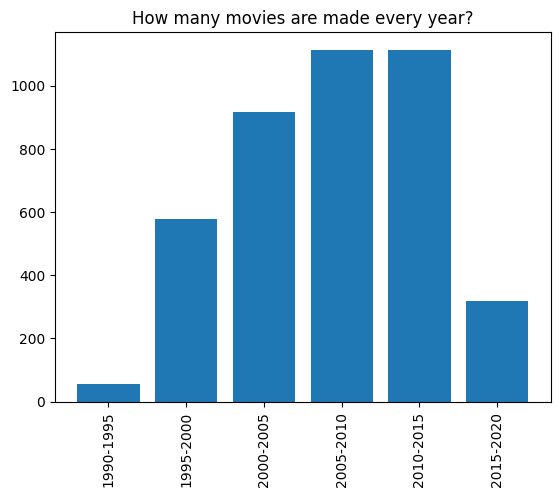

In [78]:
plt.bar(year_range_result.index, year_range_result["count"])
plt.title("How many movies are made every year?")
plt.xticks(rotation=90)
plt.show()

In [79]:
# How much profit has been made from making movies every year?

B_C_average_year_range_result = df.groupby("year_range")["B_C"].mean()

In [80]:
B_C_average_year_range_result

year_range
1990-1995     5.876706
1995-2000     9.800501
2000-2005     5.974166
2005-2010    16.104110
2010-2015    15.394104
2015-2020    15.349505
Name: B_C, dtype: float64

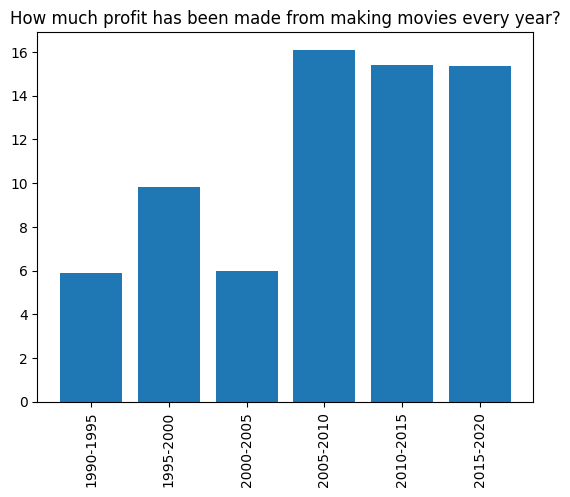

In [81]:
plt.bar(B_C_average_year_range_result.index, B_C_average_year_range_result.values)
plt.title("How much profit has been made from making movies every year?")
plt.xticks(rotation=90)
plt.show()

In [82]:
# How much did it cost to make the movie every year?

budget_average_year_range_result = df.groupby("year_range")["budget"].mean()

In [83]:
budget_average_year_range_result

year_range
1990-1995    2.982231e+07
1995-2000    3.576599e+07
2000-2005    3.642238e+07
2005-2010    3.613660e+07
2010-2015    3.921277e+07
2015-2020    4.143119e+07
Name: budget, dtype: float64

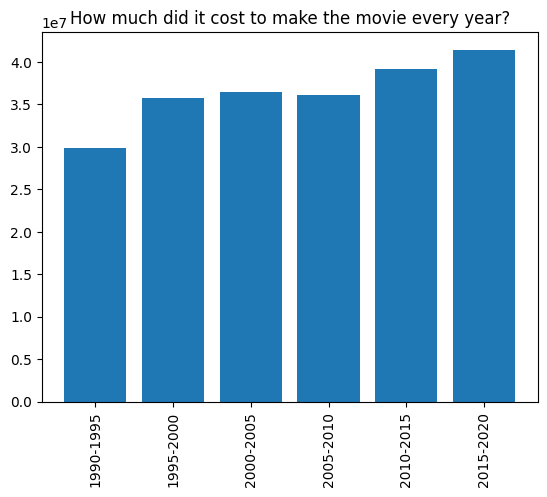

In [84]:
plt.bar(budget_average_year_range_result.index, budget_average_year_range_result.values)
plt.title("How much did it cost to make the movie every year?")
plt.xticks(rotation=90)
plt.show()

In [85]:
# How much revenue did the movie make every year?

revenue_average_year_range_result = df.groupby("year_range")["revenue"].mean()

In [86]:
revenue_average_year_range_result

year_range
1990-1995    1.190868e+08
1995-2000    8.728910e+07
2000-2005    9.257269e+07
2005-2010    9.442044e+07
2010-2015    1.155651e+08
2015-2020    1.367284e+08
Name: revenue, dtype: float64

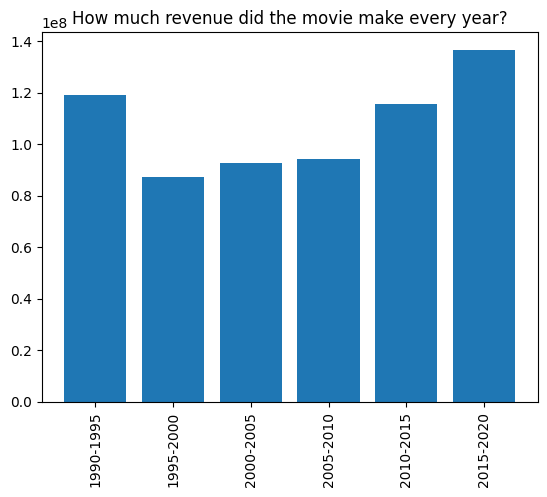

In [87]:
plt.bar(revenue_average_year_range_result.index, revenue_average_year_range_result.values)
plt.title("How much revenue did the movie make every year?")
plt.xticks(rotation=90)
plt.show()